# Rideshare Analysis - SQL

For this project, I am working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. I will analyze the data to find patterns in the available information. I also want to understand passenger preferences and the impact of external factors on rides. I will study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Description of the data
#### project_sql_result_01.csv. It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

#### project_sql_result_04.csv. It contains the following data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

#### Reading in data

In [2]:
company = pd.read_csv('project_sql_result_01.csv')
company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [3]:
dropoff = pd.read_csv('project_sql_result_04.csv')
dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


#### Looking at data types and missing values

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


#### Data Exploration

In [6]:
#looking at the top ten drop off locations 
dropoff.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


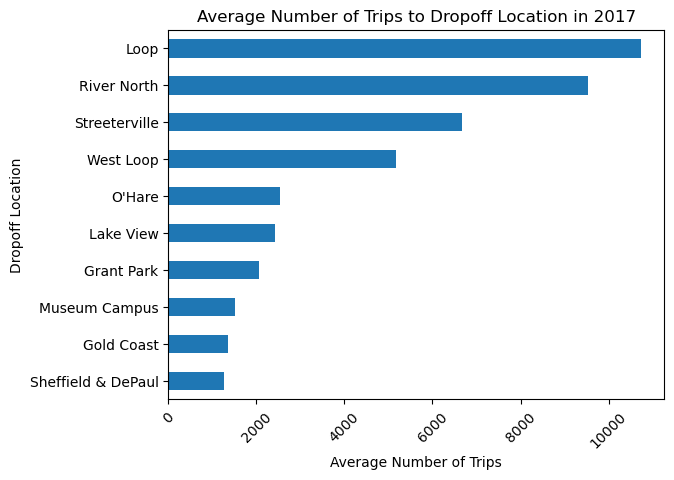

In [7]:
#plotting the top ten drop off locations
dropoff.sort_values(by='average_trips', ascending=False).head(10) \
    .plot.barh(x='dropoff_location_name',y='average_trips', legend=False).invert_yaxis()
plt.xticks(rotation=45)
plt.xlabel('Average Number of Trips')
plt.ylabel('Dropoff Location')
plt.title('Average Number of Trips to Dropoff Location in 2017');

The top three average drop off locations are Loop, River North, and Streeterville. 

In [8]:
#lookinag at the top ten cab companies with the most amount of trips
company.sort_values(by='trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


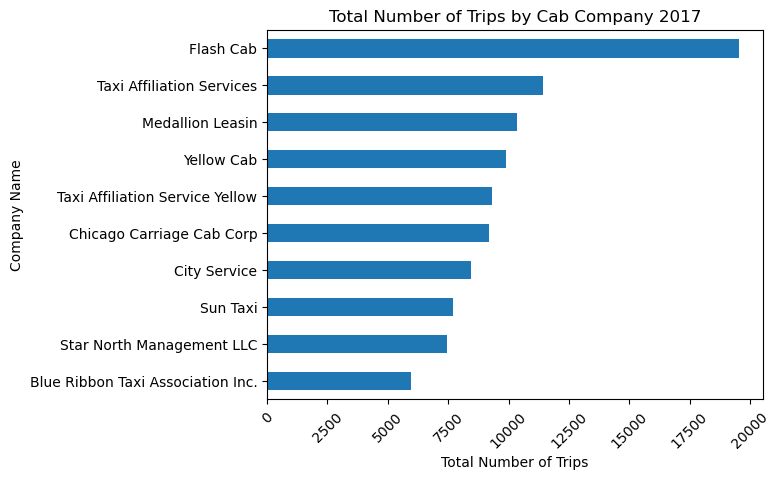

In [9]:
#plotting the top ten cab companies with their trips
company.sort_values(by='trips_amount', ascending=False).head(10) \
    .plot.barh(x='company_name', y='trips_amount', legend=False).invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Company Name')
plt.xlabel('Total Number of Trips')
plt.title('Total Number of Trips by Cab Company 2017');

Flash Cab has the top overall number of trips by a large margin, followed by Taxi Affiliation Services. Not too far behind is Medallian Leasing. 

### Preparing Data to Test Hypothesis

In [10]:
#reading in the data
loop_ohare = pd.read_csv('project_sql_result_07.csv')
loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [11]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### Hypothesis:
Null: The average duration of rides from the Loop to O'Hare International Airport does not differ on rainy Saturdays.

Alternative: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

The null hypothesis is that there are no differences in the two populations. The alternative hypothesis is simply the opposite. A standard alpha of 0.05 was chosen. 

In [12]:
#defining the two populations to test 
good = loop_ohare[loop_ohare['weather_conditions'] == 'Good']['duration_seconds']
bad = loop_ohare[loop_ohare['weather_conditions'] == 'Bad']['duration_seconds']

In [13]:
# testing the hypotheses, creating a function to also test if variance is equal between the two populations
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=st.levene(sample1, sample2).pvalue.astype(int)
    
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('We reject the null hypothesis: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to reject null hypothesis: We don't have enough evidence to say that averages of sample 1 \
        and sample 2 are not the same") 

In [14]:
#looking at the just the p-value
st.ttest_ind(good, bad).pvalue

6.517970327099473e-12

In [15]:
#applying t_test to good and bad weather
t_test(good, bad, alpha=0.05)

We reject the null hypothesis: average of sample 1 is not equal to average of sample 2


### Conclusion:
The number 1 drop off location is the Loop followed by River North. The most popular cab company is Flash Cab and almost doubles the amount of trips of the other companies. From testing our hypothesis, we also found that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.